# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic

The problem we are addressing is total energy consumption vs energy output

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
On our trajectory (the world) how long can we really last with how we manage our energy. Is it really sustainable? Are there better decisions to be made regarding how to acquire green energy and reuse it.

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 There are many more sustainable ways to harvest energy. We will eliminate fossil fuels and operate on full green energy such as wind and solar.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy
https://www.kaggle.com/datasets/soheiltehranipour/co2-dataset-in-usa 
I have found only 2 datasets that would make sense to me to use at the moment. I have found a dataset on World Energy Consumption and Data on sustainable energy.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

Energy Consumption and Efficiency Analysis: Assess the energy consumption of buildings, industries, or households over time.
Calculate energy efficiency and identify opportunities for energy conservation.
Analyze the impact of energy-efficient technologies and practices.
Renewable Energy Adoption:Investigate the growth of renewable energy sources like solar, wind, and hydroelectric power.
Analyze factors influencing the adoption of renewable energy technologies.
Assess the environmental and economic benefits of renewable energy.

Carbon Emissions and Climate Change: Study historical and current carbon emissions data.
Assess the impact of emissions on global and regional climate change.
Analyze the effectiveness of carbon reduction policies and practices.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [51]:
data = pd.read_csv('data/global-data-on-sustainable-energy (1).csv')

In [52]:
print(data.head())  # View the first few rows of the dataset
print(data.info())  # Get information about columns and data types
print(data.describe())  # Summary statistics for numerical columns

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

In [53]:
# Check for missing values
print(data.isnull().sum())



Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [54]:
# Check for duplicate rows
print(data.duplicated().sum())

0


In [55]:
data_without_nan = data.dropna()
print(data_without_nan.isnull().sum())

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [56]:
print(data.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [57]:
selected_columns = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']

# Extract the selected columns from the DataFrame
selected_data = data[selected_columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_data.corr()

# Display the correlation matrix
print(corr_matrix)

                                     Electricity from fossil fuels (TWh)  \
Electricity from fossil fuels (TWh)                             1.000000   
Electricity from nuclear (TWh)                                  0.646716   
Electricity from renewables (TWh)                               0.845067   

                                     Electricity from nuclear (TWh)  \
Electricity from fossil fuels (TWh)                        0.646716   
Electricity from nuclear (TWh)                             1.000000   
Electricity from renewables (TWh)                          0.492011   

                                     Electricity from renewables (TWh)  
Electricity from fossil fuels (TWh)                           0.845067  
Electricity from nuclear (TWh)                                0.492011  
Electricity from renewables (TWh)                             1.000000  


# There's a notable positive relationship between electricity generation from fossil fuels and renewables, suggesting some degree of dependency or association between them. Nuclear energy generation shows a moderate positive relationship with electricity generation from fossil fuels and a weaker relationship with renewables.

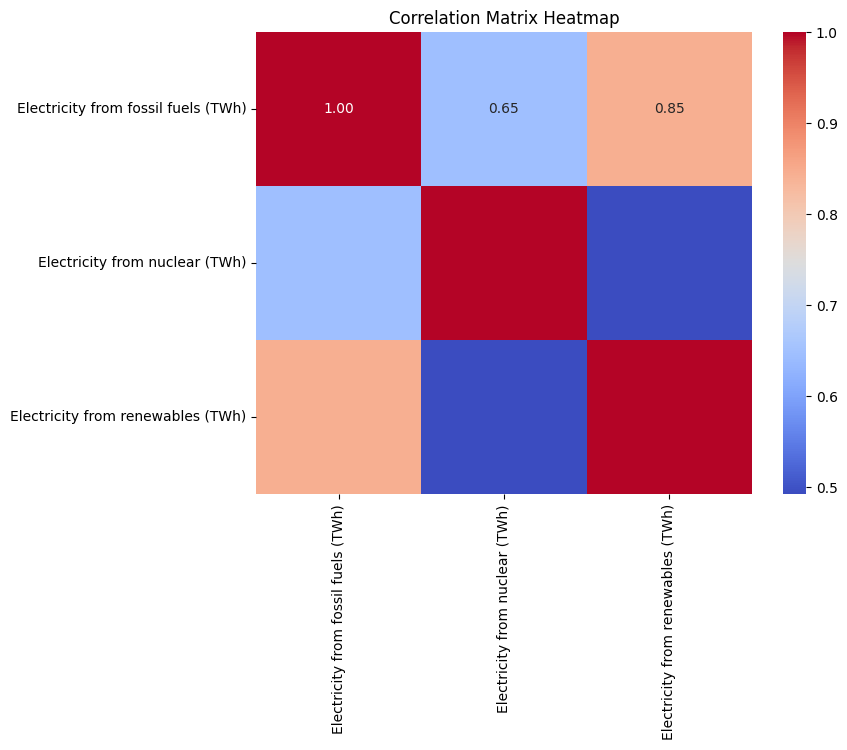

In [58]:
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

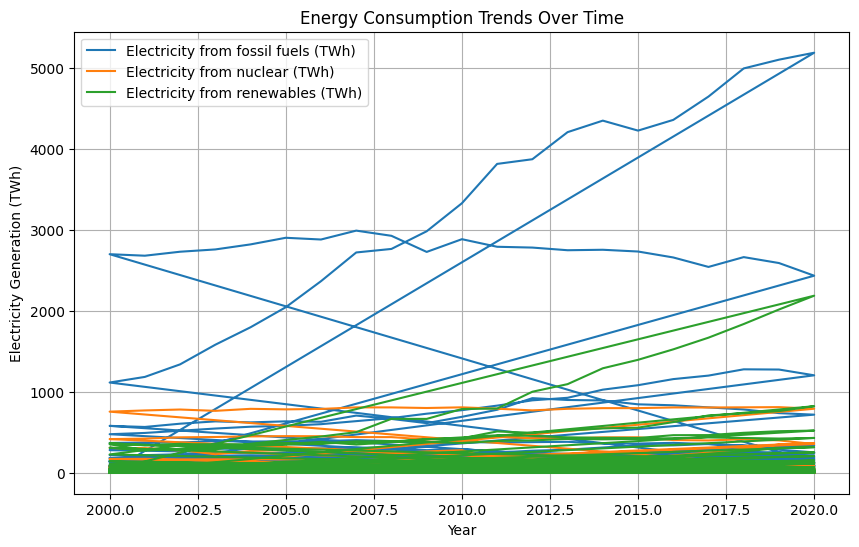

In [60]:
energy_trends = data[['Year', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

# Set the 'Year' column as the index for easy plotting
energy_trends.set_index('Year', inplace=True)

# Plotting the trends over time for energy sources
plt.figure(figsize=(10, 6))
for column in energy_trends.columns:
    plt.plot(energy_trends.index, energy_trends[column], label=column)

plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Energy Consumption Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

 This was intersting to see that fossil fuels, something we will eventually run out of, has been increasing tremendously since 2000. Renewable energy is not something that seems to put into consideration.

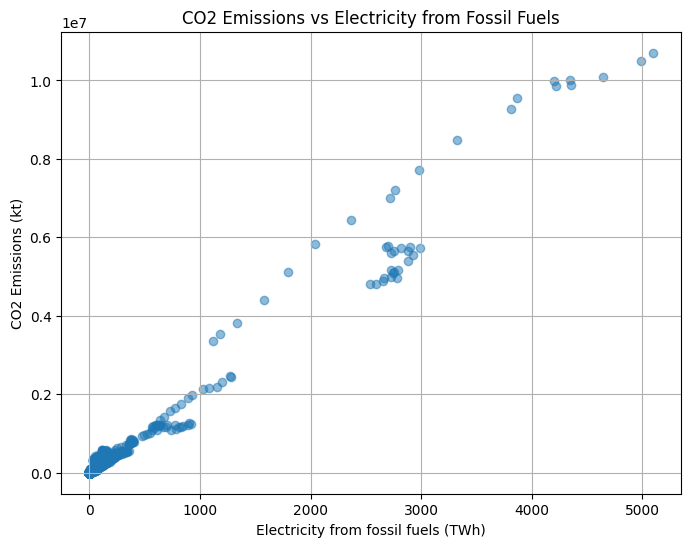

In [61]:
co2_emissions = data['Value_co2_emissions_kt_by_country']
electricity_fossil_fuels = data['Electricity from fossil fuels (TWh)']

# Plotting CO2 emissions against electricity generation from fossil fuels
plt.figure(figsize=(8, 6))
plt.scatter(electricity_fossil_fuels, co2_emissions, alpha=0.5)
plt.xlabel('Electricity from fossil fuels (TWh)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions vs Electricity from Fossil Fuels')
plt.grid(True)
plt.show()

 When we pair this with the energy consumption trend over time, we know that fossil fuel is a favorite when it comes to generating electricity, but that also means the CO2 emmisions from burning fossil fuels is not good for the environment at all.

In [62]:
grouped_by_country = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Selecting the top 3 countries with the highest total CO2 emissions
top_10_emitting_countries = grouped_by_country.nlargest(10, 'Value_co2_emissions_kt_by_country')

print(top_10_emitting_countries)

             Entity  Value_co2_emissions_kt_by_country
34            China                       1.527328e+08
169   United States                       1.065908e+08
74            India                       3.267958e+07
81            Japan                       2.367469e+07
62          Germany                       1.547289e+07
29           Canada                       1.095289e+07
168  United Kingdom                       9.412080e+06
103          Mexico                       8.892390e+06
75        Indonesia                       8.406680e+06
138    Saudi Arabia                       8.324950e+06


The value of co2 emissions is in scientific notation. For example if we look at China, 1.527328e+08 KT, that is equivalent to 152,732,800 kilotons of CO2 emissions. 
My next graph will be CO2 emissions for the top 3 countries with the highest emissions. This visualization could help observe the trajectory of CO2 emissions over time.

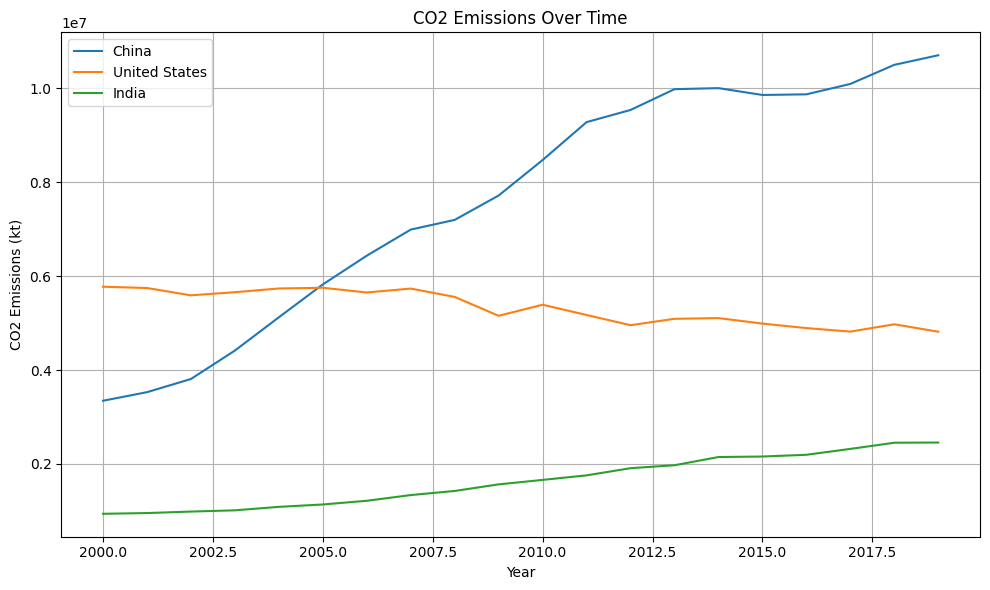

In [64]:
countries_to_plot = ['China', 'United States', 'India']

# Filtering data for selected countries
selected_countries_data = data[data['Entity'].isin(countries_to_plot)]

# Plotting CO2 emissions over the years for selected countries
plt.figure(figsize=(10, 6))
for country in countries_to_plot:
    country_data = selected_countries_data[selected_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Value_co2_emissions_kt_by_country'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Based on these trends, it seems like the United States is doing much better than India and China in terms of controlling CO2 emissions. It is still extremely high, but it has a down trend rather then an up trend like China and India

 So far, what I have completed is, 
 Calculated statistical summaries for numerical columns like CO2 emissions using Pandas' describe() method.
 Obtained value counts or frequency distribution for categorical columns using Pandas' value_counts() method.
 Created histograms or boxplots to visualize distributions of numerical columns like CO2 emissions, energy consumption, etc., using Matplotlib or Seaborn.
 Generated bar charts or count plots for categorical data to display the distribution of categories using Matplotlib or Seaborn.
 Calculated and visualized a correlation matrix to understand relationships between numerical features using Pandas and Seaborn.
 dentified and handled missing values using Pandas' isnull() or dropna() method to decide whether to impute or remove them.
 Checked and transformed data types of columns using Pandas' dtypes attribute and astype() method for conversions if needed.


 These examples cover various aspects of EDA by performing operations such as summary statistics, distribution visualizations, correlation analysis, handling missing values, outliers, and data type transformations.

 Types of machine learning I can possibly use.
 Regression Models: Predicting quantitative values such as energy consumption, CO2 emissions, or renewable energy production using linear regression, polynomial regression, or other regression techniques.


Issues and Challenges
Issues related to missing data, outliers, or inconsistencies might impact model performance. 
Different scales or distributions of features might affect the performance of some algorithms.
Guarding against overfitting by using proper cross-validation techniques and selecting appropriate evaluation metrics to measure model performance accurately.


We begin Machine learning
Will start by preprocessing the data, like checking for missing values.

In [65]:
c02 = pd.read_csv('data/co2.csv')
c02.head(5)

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [66]:
c02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [67]:
c02['Month'] = c02.YYYYMM.astype(str).str[4:6].astype(float)
c02['Year'] = c02.YYYYMM.astype(str).str[0:4].astype(float)

In [68]:
c02.shape

(523, 4)

In [69]:
c02.drop(['YYYYMM'], axis=1, inplace=True)
c02.replace([np.inf, -np.inf], np.nan, inplace=True)
c02.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [70]:
print(c02.dtypes)

Value    float64
Month    float64
Year     float64
dtype: object


In [71]:
c02.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [72]:
c02.shape

(523, 3)

In [73]:
X = c02.loc[:,['Month', 'Year']].values
y = c02.loc[:,'Value'].values

In [74]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [75]:
c02_dmatrix = xgb.DMatrix(X,label=y)

In [76]:
c02_dmatrix

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


In [79]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

After training the model, we'll check the model training score.

In [80]:
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.97


the model predicted the target variable very accurately across the different subsets of the data used for training and testing. This high score generally indicates that the model is performing well and is able to generalize effectively to unseen data.

In [81]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4.474202


In [85]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.989110


As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 4.95 R-Squared Score ~ 98.8% Now, let's visualize the original data set using the seaborn library.

c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='Year', ylabel='Value'>

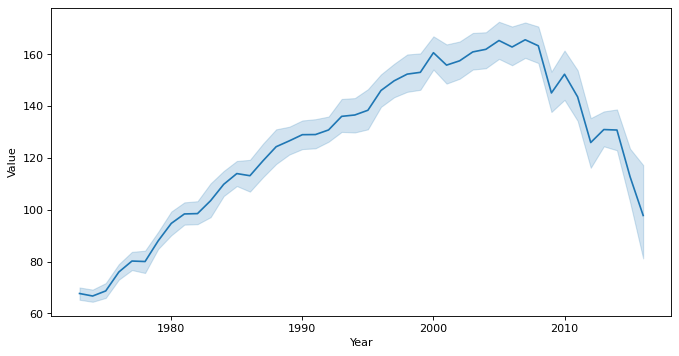

In [86]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=c02)

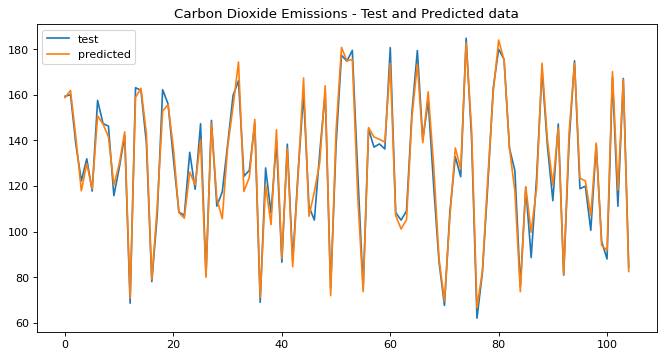

In [87]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\daria\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

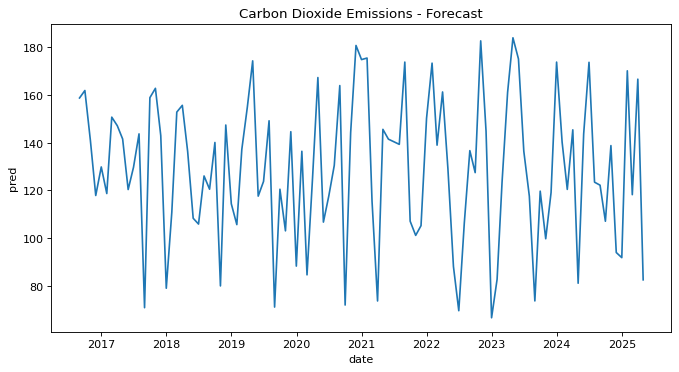

In [88]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()